In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nba = pd.read_csv("/content/drive/MyDrive/Projects/shot_logs.csv")
df = nba.copy()
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

In [ ]:
df.SHOT_CLOCK = df.SHOT_CLOCK.fillna(df.SHOT_CLOCK.mean())

In [ ]:
len(df.TOUCH_TIME[df.TOUCH_TIME<0])

312

In [ ]:
df.TOUCH_TIME[df.TOUCH_TIME<0] = df.TOUCH_TIME.mean()

<ipython-input-8-c1c1002dfccf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TOUCH_TIME[df.TOUCH_TIME<0] = df.TOUCH_TIME.mean()


In [ ]:
len(df.TOUCH_TIME[df.TOUCH_TIME<0])

0

In [ ]:
len(df.TOUCH_TIME[df.TOUCH_TIME>24.0])

4

In [ ]:
df.TOUCH_TIME[df.TOUCH_TIME>24.0] = 24

<ipython-input-11-311d7ed9d614>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TOUCH_TIME[df.TOUCH_TIME>24.0] = 24


In [ ]:
df.LOCATION = df.LOCATION.map({"H":1,"A":0})
df.W = df.W.map({"W":1,"L":0})
df.PTS_TYPE = df.PTS_TYPE.map({2:0,3:1})
df.SHOT_RESULT = df.SHOT_RESULT.map({"made":1,"missed":0})

In [ ]:
df = df.rename(columns={"LOCATION":"HOME_AWAY","PTS_TYPE":"3PTS_SHOT","player_name":"PLAYER_NAME","player_id":"PLAYER_ID"})

In [ ]:
df.GAME_CLOCK = df.GAME_CLOCK.apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))

In [ ]:
df = df.drop(columns=["GAME_ID",
                          "MATCHUP",
                          "W",
                          "PLAYER_NAME",
                          "SHOT_NUMBER",
                          "CLOSEST_DEFENDER",
                          "CLOSEST_DEFENDER_PLAYER_ID",
                          "FGM",
                          "PTS",
                          "PLAYER_ID"], axis=1)

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.3.0'

In [ ]:
from pycaret.classification import *
s = setup(df, target = 'SHOT_RESULT', session_id = 123)

,Description,Value
0,Session id,123
1,Target,SHOT_RESULT
2,Target type,Binary
3,Original data shape,"(128069, 11)"
4,Transformed data shape,"(128069, 11)"
5,Transformed train set shape,"(89648, 11)"
6,Transformed test set shape,"(38421, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6212,0.6480,0.3469,0.6526,0.4530,0.2028,0.2265,10.9020
lightgbm,Light Gradient Boosting Machine,0.6203,0.6463,0.3609,0.6427,0.4622,0.2030,0.2233,4.4390
ada,Ada Boost Classifier,0.6154,0.6415,0.4242,0.6068,0.4993,0.2027,0.2113,2.6030
xgboost,Extreme Gradient Boosting,0.6135,0.6346,0.3903,0.6141,0.4773,0.1941,0.2067,1.0300
ridge,Ridge Classifier,0.6101,0.0000,0.4702,0.5857,0.5216,0.1992,0.2026,0.1010
lda,Linear Discriminant Analysis,0.6101,0.6350,0.4711,0.5855,0.5221,0.1993,0.2027,0.1400
lr,Logistic Regression,0.6098,0.6350,0.4725,0.5847,0.5226,0.1989,0.2021,4.6220
qda,Quadratic Discriminant Analysis,0.6055,0.6219,0.4687,0.5787,0.5179,0.1902,0.1932,0.1340
rf,Random Forest Classifier,0.6053,0.6264,0.4112,0.5914,0.4851,0.1816,0.1895,22.7870
et,Extra Trees Classifier,0.6043,0.6263,0.4177,0.5877,0.4883,0.1805,0.1875,13.5790


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

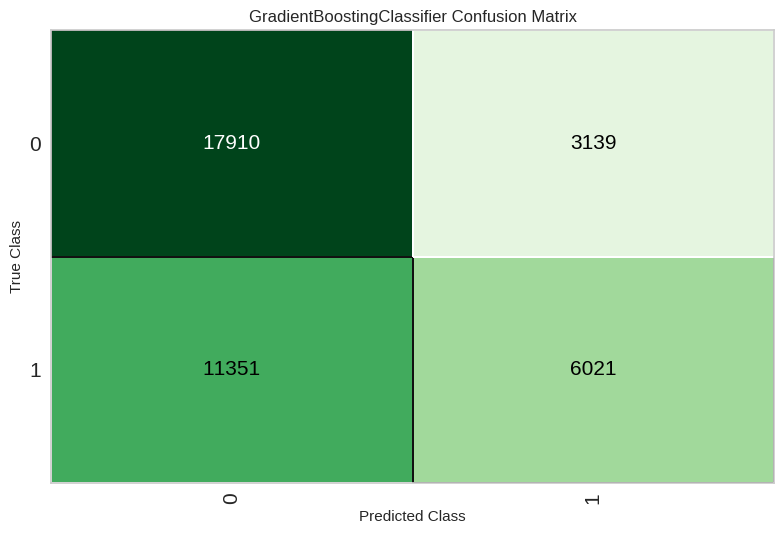

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

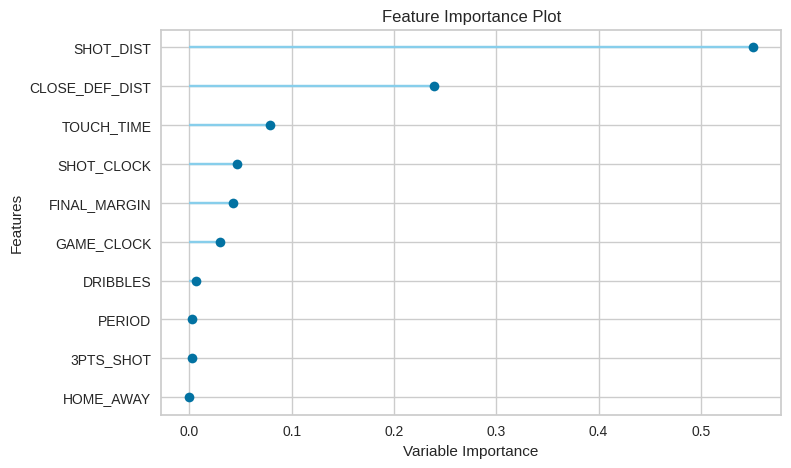

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7bc0b6b7b520>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method='pr...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7bc0b6b7b880>,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7bc0b6b7bac0>,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


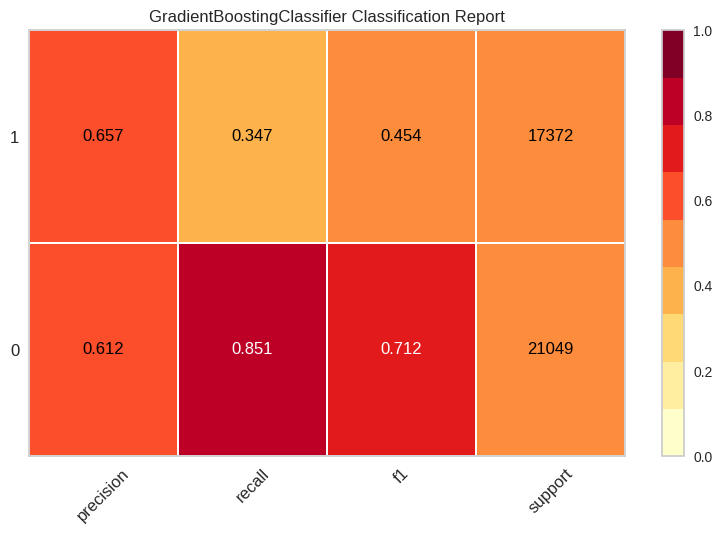

In [ ]:
# plot class report
plot_model(best, plot = 'class_report')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X1 = df[["HOME_AWAY",	"FINAL_MARGIN",	"PERIOD",	"GAME_CLOCK",	"SHOT_CLOCK",	"DRIBBLES",	"TOUCH_TIME",	"SHOT_DIST", "3PTS_SHOT",	"CLOSE_DEF_DIST"]]
Y1 = df['SHOT_RESULT']

In [ ]:
X1_Train, X1_Test, Y1_Train, Y1_Test = train_test_split(X1, Y1, test_size=0.2)

In [ ]:
%%time
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X1_Train, Y1_Train)

CPU times: user 17.1 s, sys: 25.4 ms, total: 17.1 s
Wall time: 17.2 s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# Make predictions
Y1_Pred = gb_clf.predict(X1_Test)

In [ ]:
# Evaluate model
print("Accuracy:", accuracy_score(Y1_Test, Y1_Pred))
print("Classification Report:\n", classification_report(Y1_Test, Y1_Pred))

Accuracy: 0.6222768798313423
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.85      0.71     14037
           1       0.66      0.34      0.45     11577

    accuracy                           0.62     25614
   macro avg       0.63      0.60      0.58     25614
weighted avg       0.63      0.62      0.59     25614

